## Make all import

In [63]:
import pyfits
import os
import pprint
import numpy as np

from PyQt4 import QtCore, QtGui
from IPython.display import display
from ipywidgets import widgets
from ipywidgets.widgets import interact

import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
import matplotlib as mpl
font = {'family' : 'monospace',
       'size' : '14'}
mpl.rc('font', **font)

## Default folder 

In [4]:
default_dir = os.path.join('/Volumes','My Book Thunderbolt Duo', 'IPTS', 'IPTS-12534')
assert os.path.isdir(default_dir)

## Select and load raw images

In [5]:
%gui qt

In [6]:
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name.
    """
    if dir is None: dir ='./'
    fname = QtGui.QFileDialog.getOpenFileNames(None, "Select file...", 
            dir, filter="FITS files (*.fits);; All files (*)")
    return fname

In [7]:
%gui qt
list_files = gui_fname(dir=default_dir)
%matplotlib inline

In [31]:
w = widgets.IntProgress(description="Loading raw data")
w.max = len(list_files)
display(w)

raw_data = []
for _index, _file in enumerate(list_files):
    _hdu_list = pyfits.open(_file)
    _data = _hdu_list[0]
    _image = np.asarray(_data.data)
    raw_data.append(_image)
    w.value = _index + 1

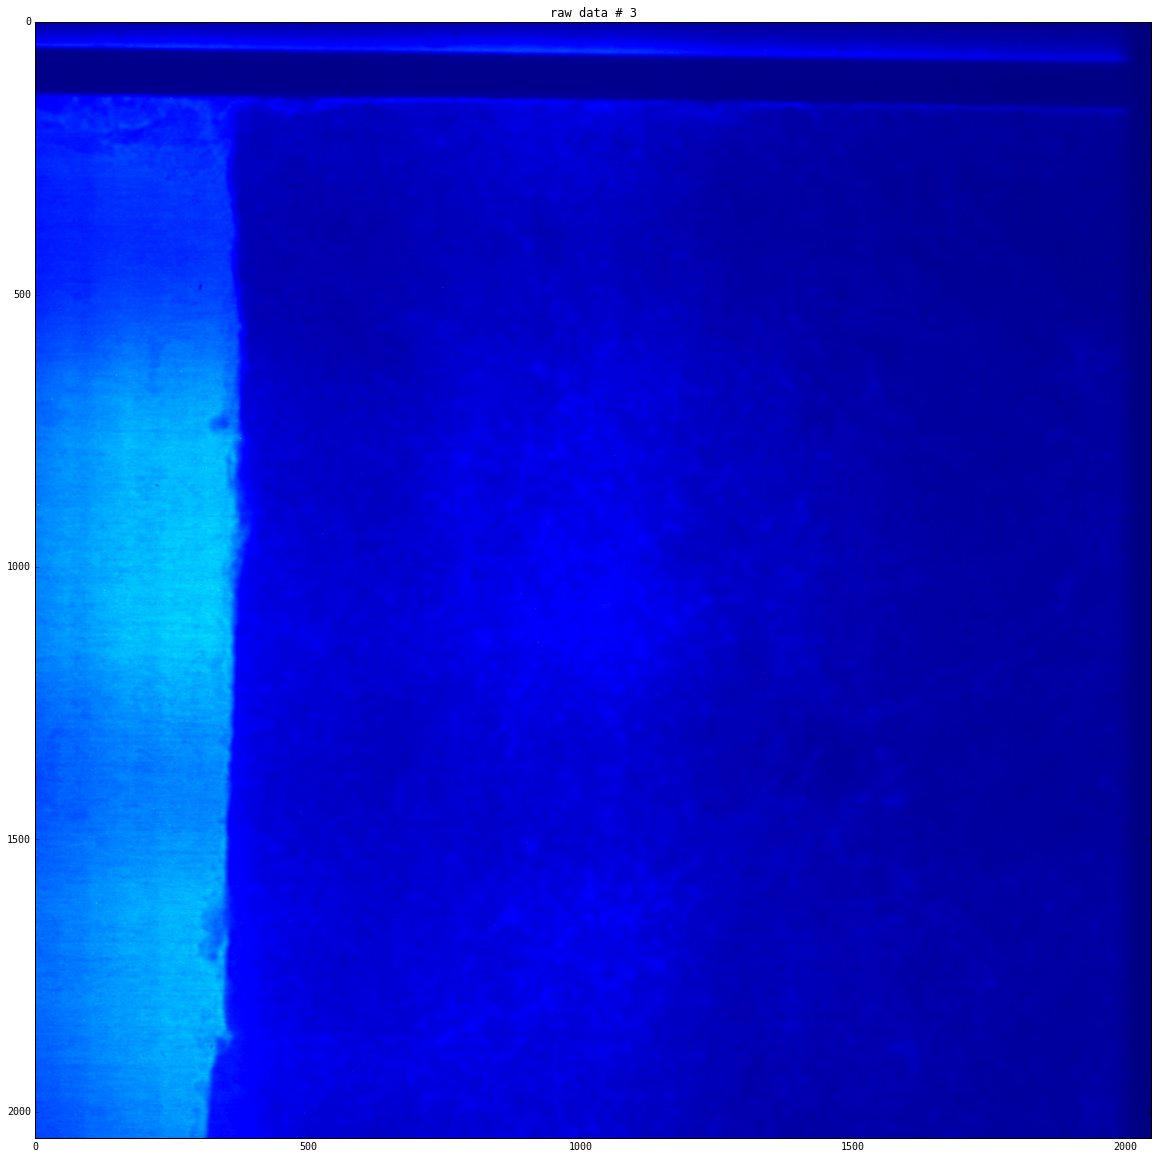

In [65]:
def display_image(image_index):
    fig = plt.figure(figsize=(20,20))
    ax_img = plt.subplot(111)
    ax_img.imshow(raw_data[image_index])
    ax_img.set_title("raw data # {}".format(image_index))

preview = interact(display_image,
                  image_index = widgets.IntSlider(min=0,
                                                 max=len(raw_data),
                                                 value=0,
                                                 description="Image Index"))

### Select OB files

In [32]:
%gui qt
list_ob_files = gui_fname(dir=default_dir)
%matplotlib inline

In [30]:
w = widgets.IntProgress(description="Loading OB data")
w.max = len(list_ob_files)
display(w)

ob_data = []
for _index, _file in enumerate(list_ob_files):
    _hdu_list = pyfits.open(_file)
    _data = _hdu_list[0]
    _image = np.asarray(_data.data)
    ob_data.append(_image)
    w.value = _index + 1

### Calculate Average OB 

In [34]:
average_ob_data = ob_data[0]
for _index, _ob in enumerate(ob_data[1:]):
    average_ob_data += _ob
average_ob_data = np.divide(average_ob_data, len(ob_data))

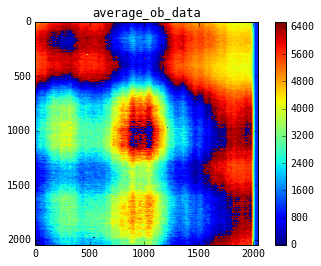

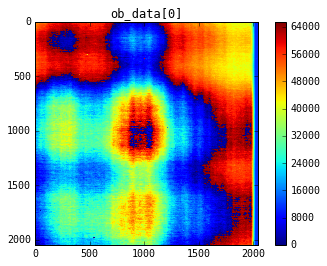

In [133]:
figure1 = plt.figure(figsize=(15,15))

fig, ax = plt.subplots(1,1)
img1 = ax.imshow(average_ob_data)
ax.set_title("average_ob_data")
cb = fig.colorbar(img1)

fig, ax = plt.subplots(1,1)
img2 = ax.imshow(ob_data[0])
ax.set_title("ob_data[0]")
cb = fig.colorbar(img2)


### histogram 

In [86]:
print("min value of raw_data: {}".format(np.min(raw_data[3])))
print("min value of average_ob_data: {}".format(np.min(average_ob_data)))
print("-------")
print("max value of raw_data: {}".format(np.max(raw_data[3])))
print("max value of average_ob_data: {}".format(np.max(average_ob_data)))

min value of raw_data: 936
min value of average_ob_data: 0.0
-------
max value of raw_data: 28567
max value of average_ob_data: 6553.5


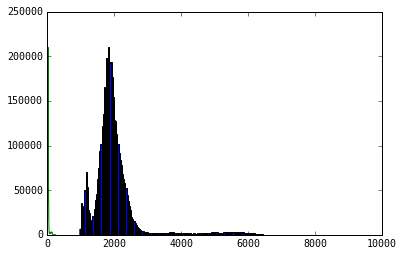

In [80]:
_histo_raw = plt.hist(raw_data[0].flatten(), bins=256)
#_histo_ob = plt.hist(average_ob_data.flatten(), bins=256, c='r')
plt.plot(_histo_raw[0])
#plt.plot(_histo_ob[0])

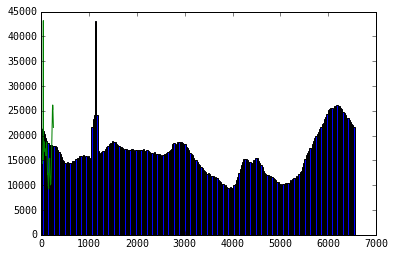

In [143]:
_histo_ob = plt.hist(average_ob_data.flatten(), bins=256)
plt.plot(_histo_ob[0])

### Normalize data

In [101]:
w = widgets.IntProgress(description="Loading OB data")
w.max = len(raw_data)
display(w)
_index = 0

normalized_data = []
for _data in raw_data:
    normalized_data.append(_data / average_ob_data)
    w.value = _index + 1
    _index += 1

/Users/j35/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide


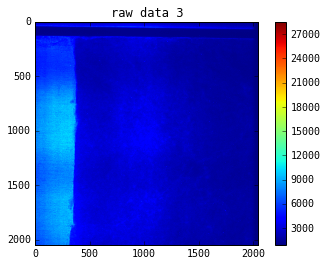

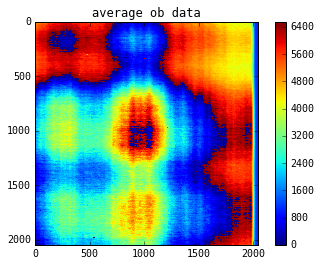

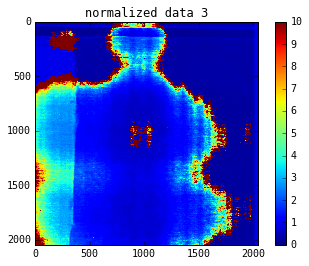

In [148]:
min_intensity = 0
max_intensity = 10
image_to_display = 3

figure1 = plt.figure(figsize=(15,15))

fig, ax = plt.subplots(1,1)
img1 = ax.imshow(raw_data[image_to_display])
ax.set_title("raw data {}".format(image_to_display))
cb = fig.colorbar(img1)

fig2, ax2 = plt.subplots(1,1)
img2 = ax2.imshow(average_ob_data)
ax2.set_title("average ob data")
cb2 = fig2.colorbar(img2)

fig3, ax3 = plt.subplots(1,1)
img3 = ax3.imshow(normalized_data[image_to_display],
                 vmin = min_intensity,
                 vmax = max_intensity,
                 interpolation=None)
ax3.set_title("normalized data {}".format(image_to_display))
cb3 = fig3.colorbar(img3)

### Check normalization operation is correct

In [130]:
# number of random values
nbr_random = 10
image_to_check = 3

In [141]:
# random x and y position
[height, width] = np.shape(normalized_data[0])

random_y = [int(y) for y in np.random.random(nbr_random)*height]
random_x = [int(x) for x in np.random.random(nbr_random)*width]
_data = raw_data[image_to_check]
_normalized = normalized_data[image_to_check]

#pprint.pprint(random_y)
#pprint.pprint(random_x)

for _x, _y in zip(random_x, random_y):
    print("raw_data[{},{}] = {}".format(_y, _x, _data[_y, _x]))
    print("ob_data[{}, {}] = {}".format(_y, _x, average_ob_data[_y, _x]))
    print("normalized[{},{}] = {}".format(_y, _x, _normalized[_y, _x]))
    print()

raw_data[1973,1488] = 2199
ob_data[1973, 1488] = 1143.9
normalized[1973,1488] = 1.9223708366115917

raw_data[297,604] = 2217
ob_data[297, 604] = 5854.2
normalized[297,604] = 0.378702470021523

raw_data[718,362] = 7214
ob_data[718, 362] = 2457.6
normalized[718,362] = 2.9353841145833335

raw_data[455,1007] = 2700
ob_data[455, 1007] = 1310.0
normalized[455,1007] = 2.0610687022900764

raw_data[604,255] = 7679
ob_data[604, 255] = 1513.2
normalized[604,255] = 5.074676182923605

raw_data[327,1162] = 2385
ob_data[327, 1162] = 6543.7
normalized[327,1162] = 0.364472698931797

raw_data[2017,1175] = 2633
ob_data[2017, 1175] = 1939.3
normalized[2017,1175] = 1.3577063889032126

raw_data[1482,506] = 2741
ob_data[1482, 506] = 1765.5
normalized[1482,506] = 1.5525346927216086

raw_data[175,99] = 5250
ob_data[175, 99] = 6243.4
normalized[175,99] = 0.840887977704456

raw_data[182,2028] = 1061
ob_data[182, 2028] = 1071.0
normalized[182,2028] = 0.9906629318394025



#### math is correct.